## Telecom Customer Churn Analysis

### Executive Summary

Customer churn, the rate at which customers discontinue their service, is a critical challenge for telecom companies, directly impacting revenue and growth. This project aims to address this issue by analyzing customer behavior and identifying key factors that contribute to churn. By understanding these drivers, telecom providers can develop targeted strategies for customer retention and improve overall satisfaction.

### Project Objective

The primary objective of this analysis is to gain comprehensive insights into the characteristics and behaviors of churning versus non-churning customers. This exploratory data analysis (EDA) will lay the foundational understanding required for building robust predictive models in subsequent phases, enabling the identification of at-risk customers proactively.

### Dataset Overview

The analysis is based on a simulated telecom customer dataset. It includes approximately 240,000 unique customer records, encompassing various attributes such as demographic information (gender, age, location), telecom partner, date of registration, number of dependents, estimated salary, and detailed usage statistics (calls made, SMS sent, data used). The dataset also includes a 'churn' flag, indicating whether a customer has churned (1) or not (0).

### Notebook Structure

This Jupyter Notebook is structured into the following key sections:

1.  **Data Loading and Initial Inspection**: Loading the dataset and performing initial checks to understand its structure and raw content.
2.  **Data Cleaning and Preprocessing**: Handling missing values, correcting erroneous entries, and transforming data types to prepare for analysis.
3.  **Exploratory Data Analysis (EDA)**: In-depth analysis of various features to uncover patterns, distributions, and relationships with churn.
4.  **Feature Engineering**: Creating new, more informative features from existing data to enhance predictive power.

## Step 1: Data Loading and Initial Inspection

In this initial phase, we load the dataset into a pandas DataFrame and perform preliminary checks to understand its structure, data types, and a statistical summary of the numerical columns. This helps in identifying potential issues such as missing values, incorrect data types, or outliers that need to be addressed in subsequent cleaning steps.

### Loading the Dataset

The dataset is loaded from a CSV file named `updated_telecom_churn.csv`.


In [1]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv(r"C:\Users\sahil\Downloads\updated_telecom_churn.csv")

print("Dataset loaded successfully.")

Dataset loaded successfully.


In [2]:
df.head()

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,0
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,0
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   customer_id           243553 non-null  int64 
 1   telecom_partner       243553 non-null  object
 2   gender                243553 non-null  object
 3   age                   243553 non-null  int64 
 4   state                 243553 non-null  object
 5   city                  243553 non-null  object
 6   pincode               243553 non-null  int64 
 7   date_of_registration  243553 non-null  object
 8   num_dependents        243553 non-null  int64 
 9   estimated_salary      243553 non-null  int64 
 10  calls_made            243553 non-null  int64 
 11  sms_sent              243553 non-null  int64 
 12  data_used             243553 non-null  int64 
 13  churn                 243553 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 26.0+ MB


In [4]:
df.describe()

,customer_id,age,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
count,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000
mean,121777.000000,46.077609,549501.270541,1.997500,85021.137839,49.010548,23.945404,4993.186025,0.199850
std,70307.839393,16.444029,259808.860574,1.414941,37508.963233,29.453556,14.733575,2942.019547,0.399888
min,1.000000,18.000000,100006.000000,0.000000,20000.000000,-10.000000,-5.000000,-987.000000,0.000000
25%,60889.000000,32.000000,324586.000000,1.000000,52585.000000,24.000000,11.000000,2490.000000,0.000000
50%,121777.000000,46.000000,548112.000000,2.000000,84990.000000,49.000000,24.000000,4987.000000,0.000000
75%,182665.000000,60.000000,774994.000000,3.000000,117488.000000,74.000000,36.000000,7493.000000,0.000000
max,243553.000000,74.000000,999987.000000,4.000000,149999.000000,108.000000,53.000000,10991.000000,1.000000


## Step 2: Data Cleaning and Preprocessing

This phase focuses on ensuring the quality and usability of our data by addressing inconsistencies, correcting erroneous entries, and transforming data types. Clean data is crucial for accurate analysis and meaningful insights.

### Addressing Illogical 'data_used' Values

The initial inspection revealed negative values in the 'data_used' column, which are illogical for consumption metrics. These negative values are treated as invalid entries and converted to `NaN` (Not a Number). This step ensures that our usage calculations are based on valid data.

In [5]:
# Fix invalid 'data_used' values: Convert to numeric first (handles potential non-numeric entries),
# then replace negative values with NaN.
df['data_used'] = pd.to_numeric(df['data_used'], errors='coerce')
df.loc[df['data_used'] < 0, 'data_used'] = np.nan

print("Negative 'data_used' values replaced with NaN.")

Negative 'data_used' values replaced with NaN.


### Converting `date_of_registration` to Datetime

The `date_of_registration` column is currently stored as an object (string). To perform time-based calculations, such as determining customer tenure, it needs to be converted into a datetime data type.

In [6]:
# Convert 'date_of_registration' to datetime
df['date_of_registration'] = pd.to_datetime(df['date_of_registration'], errors='coerce')

print("'date_of_registration' converted to datetime format.")

'date_of_registration' converted to datetime format.


### Creating `tenure_days`

Customer tenure, representing the duration a customer has been registered, is a vital loyalty indicator. We calculate this by subtracting the registration date from the current date and extracting the number of days.

In [7]:
# Create 'tenure_days'
# Using pd.to_datetime('today') to calculate tenure up to the current date
df['tenure_days'] = (pd.to_datetime('today') - df['date_of_registration']).dt.days

print("'tenure_days' feature created.")

'tenure_days' feature created.


### Calculating `total_usage`

To get an aggregated view of customer engagement, `'total_usage'` is calculated by summing the `'calls_made'`, `'sms_sent'`, and `'data_used'` for each customer. This single metric provides a holistic measure of overall activity.

In [8]:
# Create 'total_usage'
df['total_usage'] = df[['calls_made', 'sms_sent', 'data_used']].sum(axis=1)

print("'total_usage' feature created.")

'total_usage' feature created.


### Engineering 'Usage per Day' Metrics

Normalizing usage metrics by tenure provides a fairer comparison of daily engagement, irrespective of a customer's total time with the company. These `'per day'` metrics (calls, SMS, data) offer insights into consistent daily activity.

In [9]:
# Create usage per day metrics
# Note: Division by df['tenure_days'] might result in 'inf' for 0 tenure_days or 'NaN' if date_of_registration was problematic
df['calls_per_day'] = df['calls_made'] / df['tenure_days']
df['sms_per_day'] = df['sms_sent'] / df['tenure_days']
df['data_per_day'] = df['data_used'] / df['tenure_days']

# List of the new numeric columns where 'inf' or 'NaN' might have been introduced by division
cols_to_clean_usage = ['calls_per_day', 'sms_per_day', 'data_per_day']

# Replace infinite values (e.g., from division by zero) and fill NaNs with 0
# The assumption here is that if tenure is 0 or data_used was NaN, there's effectively no daily usage for that period.
for col in cols_to_clean_usage:
    df[col].replace([np.inf, -np.inf], 0, inplace=True)
    df[col].fillna(0, inplace=True)

print("'Usage per day' metrics created and cleaned.")

'Usage per day' metrics created and cleaned.


### Reviewing Data After Cleaning and Preprocessing

A final check of the DataFrame's head and information summary after all cleaning and preprocessing steps confirms the new features and corrected data types.

In [10]:
# Preview cleaned data
df.head()

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,tenure_days,total_usage,calls_per_day,sms_per_day,data_per_day
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,NaN,0,2035,89.0,0.021622,0.022113,0.000000
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973.0,0,2035,6074.0,0.030467,0.019165,2.935135
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193.0,0,2035,266.0,0.024079,0.011794,0.094840
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377.0,0,2035,9482.0,0.039312,0.012285,4.607862
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393.0,0,2035,1486.0,0.038329,0.007371,0.684521


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   customer_id           243553 non-null  int64         
 1   telecom_partner       243553 non-null  object        
 2   gender                243553 non-null  object        
 3   age                   243553 non-null  int64         
 4   state                 243553 non-null  object        
 5   city                  243553 non-null  object        
 6   pincode               243553 non-null  int64         
 7   date_of_registration  243553 non-null  datetime64[ns]
 8   num_dependents        243553 non-null  int64         
 9   estimated_salary      243553 non-null  int64         
 10  calls_made            243553 non-null  int64         
 11  sms_sent              243553 non-null  int64         
 12  data_used             237503 non-null  float64       
 13 

## Step 3: Feature Engineering - Building More Intelligent Predictors

In this crucial phase, we transition from raw data to creating powerful, engineered features. The goal is not just to add more data, but to distill meaningful business concepts—like customer loyalty, engagement, and demographic profiles—into signals that can enhance our understanding of churn. This is where data analysis creates a competitive edge, turning basic information into deeper insights.

We've already engineered 'tenure_days', 'total_usage', and 'usage per day' metrics in the preprocessing stage. Now, we will build additional features to further enrich our dataset.

### Key Features Engineered and Their Strategic Value:

* **`is_senior`**: Creates a specific demographic segment (age 60+) to isolate potential age-related churn patterns.
* **`usage_intensity`**: Combines multiple usage metrics into a single, standardized score for a holistic view of user activity.
* **`salary_bucket`**: Groups customers into income tiers ('Low', 'Mid', 'High') to find patterns based on economic standing, potentially correlating with affordability or value perception.

---

### Engineering `'is_senior'` Feature

This binary feature flags users aged 60 or more. This allows us to specifically analyze if senior customers exhibit different churn behaviors compared to other age groups, isolating age-related patterns that might influence retention.


In [12]:
# Flag users with age 60 or more as 1, others as 0
df['is_senior'] = (df['age'] >= 60).astype(int)

print("'is_senior' feature created.")

'is_senior' feature created.


### Creating `usage_intensity` Score

To capture the overall level of customer engagement in a single metric, we create `'usage_intensity'`. This is achieved by first standardizing (scaling) the `'calls_made'`, `'sms_sent'`, and `'data_used'` features. Scaling is important to ensure that features with larger numerical ranges (like data used) don't disproportionately influence the combined score. The standardized values are then summed to form the `'usage_intensity'` score.

In [13]:
from sklearn.preprocessing import StandardScaler

# Select the usage features for combination
usage_features = ['calls_made', 'sms_sent', 'data_used']

# Create a copy of the DataFrame for scaling to avoid SettingWithCopyWarning
df_scaled = df.copy()

# Scale the selected usage features
# StandardScaler transforms data to have a mean of 0 and a standard deviation of 1.
scaler = StandardScaler()
df_scaled[usage_features] = scaler.fit_transform(df[usage_features])

# Create the combined score by summing the scaled features
# This provides a normalized aggregate of calls, SMS, and data usage.
df['usage_intensity'] = df_scaled[usage_features].sum(axis=1)

print("'usage_intensity' feature created and standardized.")

'usage_intensity' feature created and standardized.


### Deriving `salary_bucket` Feature

The continuous `estimated_salary` feature is binned into three categorical groups: `'Low'`, `'Mid'`, and `'High'`. This transformation helps us investigate if customer churn varies across different income brackets, which could be indicative of service affordability or perceived value for money. Quantiles are used to create buckets with a relatively equal number of customers.

In [14]:
# Create salary buckets using quantiles
# pd.qcut divides data into equal-sized bins based on rank or distribution.
df['salary_bucket'] = pd.qcut(df['estimated_salary'], q=3, labels=['Low', 'Mid', 'High'])

print("'salary_bucket' feature created.")

'salary_bucket' feature created.


### Reviewing the DataFrame with Newly Engineered Features

A final look at the DataFrame's head and information summary confirms the addition and data types of our newly engineered features, preparing the dataset for in-depth exploratory data analysis.

In [15]:
df.head()

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,...,data_used,churn,tenure_days,total_usage,calls_per_day,sms_per_day,data_per_day,is_senior,usage_intensity,salary_bucket
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,...,NaN,0,2035,89.0,0.021622,0.022113,0.000000,0,1.258907,High
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,...,5973.0,0,2035,6074.0,0.030467,0.019165,2.935135,0,1.758811,High
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,...,193.0,0,2035,266.0,0.024079,0.011794,0.094840,0,-1.727204,High
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,...,9377.0,0,2035,9482.0,0.039312,0.012285,4.607862,0,2.613225,Low
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,...,1393.0,0,2035,1486.0,0.038329,0.007371,0.684521,0,-0.932713,Low


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   customer_id           243553 non-null  int64         
 1   telecom_partner       243553 non-null  object        
 2   gender                243553 non-null  object        
 3   age                   243553 non-null  int64         
 4   state                 243553 non-null  object        
 5   city                  243553 non-null  object        
 6   pincode               243553 non-null  int64         
 7   date_of_registration  243553 non-null  datetime64[ns]
 8   num_dependents        243553 non-null  int64         
 9   estimated_salary      243553 non-null  int64         
 10  calls_made            243553 non-null  int64         
 11  sms_sent              243553 non-null  int64         
 12  data_used             237503 non-null  float64       
 13 

## Step 4: Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a critical step to understand the underlying patterns, distributions, and relationships within our dataset. In this section, we delve into how various customer attributes and behaviors correlate with churn status, aiming to extract actionable insights.

---

### 4.1 Churn Distribution Analysis

We begin by examining the overall distribution of churned versus non-churned customers in the dataset. This provides a foundational understanding of the churn rate.


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Count churned vs not churned customers
churn_counts = df['churn'].value_counts()
churn_pct = df['churn'].value_counts(normalize=True)

In [19]:
# Create a DataFrame for summary display
churn_summary = pd.DataFrame({
    'Churn Status': churn_counts.index.map(lambda x: 'Churned' if x == 1 else 'Not Churned'),
    'Count': churn_counts.values,
    'Percentage': (churn_pct.values * 100).round(2)
})

print("Customer Churn Distribution Summary:")
print(churn_summary)

Customer Churn Distribution Summary:
  Churn Status   Count  Percentage
0  Not Churned  194879       80.02
1      Churned   48674       19.98


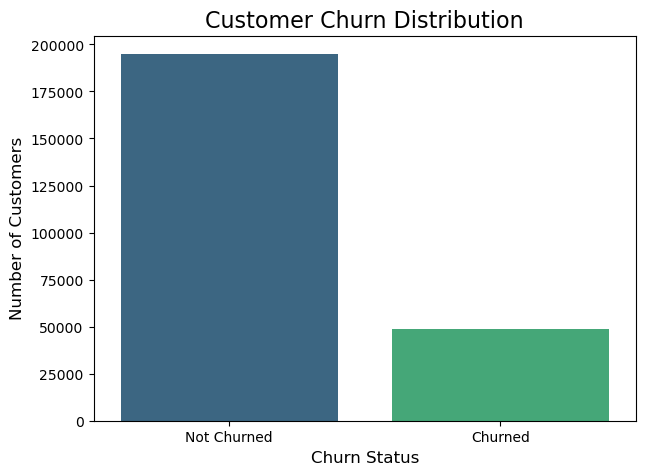

In [20]:
plt.figure(figsize=(7, 5))
sns.barplot(data=churn_summary, x='Churn Status', y='Count', palette='viridis')
plt.title("Customer Churn Distribution", fontsize=16)
plt.ylabel("Number of Customers", fontsize=12)
plt.xlabel("Churn Status", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Insight:
The analysis reveals that approximately 20% of customers have churned, while 80% have been retained. This indicates a significant portion of the customer base is leaving, highlighting a clear need for customer retention strategies.



### 4.2 Churn by Gender
Next, we investigate whether there's a difference in churn rates between male and female customers. This helps determine if gender is a significant factor in churn behavior.



In [21]:
# Calculate churn rate by gender
churn_by_gender = df.groupby('gender')['churn'].agg(['count', 'sum'])
churn_by_gender['churn_rate'] = (churn_by_gender['sum'] / churn_by_gender['count']).round(2)
churn_by_gender = churn_by_gender.rename(columns={
    'count': 'Total Users',
    'sum': 'Churned Users',
    'churn_rate': 'Churn Rate'
})
print("\nChurn Rate by Gender:")
print(churn_by_gender)


Churn Rate by Gender:
        Total Users  Churned Users  Churn Rate
gender                                        
F             97576          19480         0.2
M            145977          29194         0.2


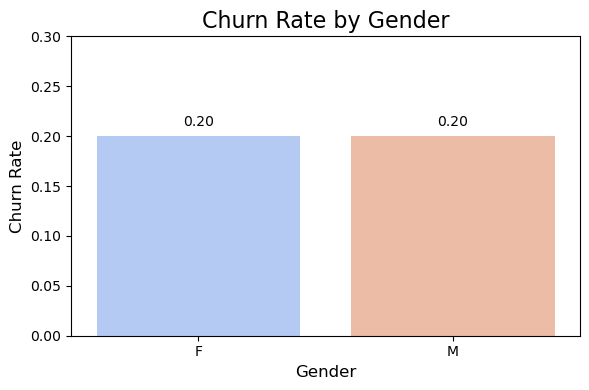

In [22]:
# Plotting the churn rate by gender
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=churn_by_gender.index, y=churn_by_gender['Churn Rate'], palette='coolwarm')
plt.title("Churn Rate by Gender", fontsize=16)
plt.ylabel("Churn Rate", fontsize=12)
plt.xlabel("Gender", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, 0.3) # Set a consistent y-limit for churn rates

# Add churn rate labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points', fontsize=10, color='black')

plt.tight_layout()
plt.show()

### Insight:
Both male and female users exhibit a consistent churn rate of 20%. This suggests that customer churn is not significantly gender-biased in this dataset and is likely driven by other service or value-related factors.

### 4.3 Churn by Telecom Partner
Understanding churn rates across different telecom partners is crucial for competitive analysis and identifying underperforming services.

In [23]:
# Calculate churn rate by telecom partner, sorted by churn rate
churn_by_partner = df.groupby('telecom_partner')['churn'].agg(['count', 'sum'])
churn_by_partner['churn_rate'] = (churn_by_partner['sum'] / churn_by_partner['count']).round(2)
churn_by_partner = churn_by_partner.rename(columns={
    'count': 'Total Users',
    'sum': 'Churned Users',
    'churn_rate': 'Churn Rate'
}).sort_values(by='Churn Rate', ascending=False) # Sort for better visualization

print("\nChurn Rate by Telecom Partner (Sorted):")
print(churn_by_partner)


Churn Rate by Telecom Partner (Sorted):
                 Total Users  Churned Users  Churn Rate
telecom_partner                                        
BSNL                   60723          18216        0.30
Vodafone               60802          15200        0.25
Reliance Jio           61123           9168        0.15
Airtel                 60905           6090        0.10


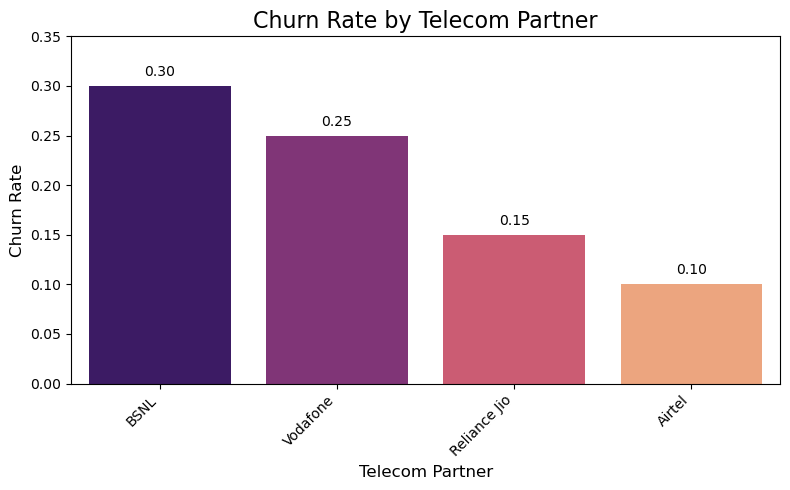

In [24]:
# Plotting the churn rate by telecom partner
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=churn_by_partner.index, y=churn_by_partner['Churn Rate'], palette='magma')
plt.title("Churn Rate by Telecom Partner", fontsize=16)
plt.ylabel("Churn Rate", fontsize=12)
plt.xlabel("Telecom Partner", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10) # Rotate labels for readability
plt.yticks(fontsize=10)
plt.ylim(0, 0.35) # Consistent y-limit for churn rates

# Add churn rate labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points', fontsize=10, color='black')

plt.tight_layout()
plt.show()

### Insight:
There's a significant variation in churn rates among telecom partners:

 - __BSNL__ has the highest churn rate at 30%.

 - __Vodafone__ follows with 25% churn.

 - __Reliance Jio__ stands at 15%.

 - __Airtel__ boasts the lowest churn at 10%.
>This strongly indicates that the telecom partner is a major influencing factor for churn, suggesting potential issues with service quality, pricing, or customer support for BSNL and Vodafone.


### 4.4 Churn by Age Group
We segment customers into age buckets to analyze if different age demographics have varying propensities to churn.



In [25]:
# Categorize age into buckets using the 'age_group' feature created earlier
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 40, 60, 100], labels=['Youth', 'Adult', 'Middle Age', 'Senior'])

In [26]:
# Calculate churn rate by age group
age_churn = df.groupby('age_group')['churn'].agg(['count', 'sum'])
age_churn['churn_rate'] = (age_churn['sum'] / age_churn['count']).round(2)
age_churn = age_churn.rename(columns={'count': 'Total Users', 'sum': 'Churned Users', 'churn_rate': 'Churn Rate'})
print("\nChurn Rate by Age Group:")
print(age_churn)


Churn Rate by Age Group:
            Total Users  Churned Users  Churn Rate
age_group                                         
Youth             34026           6773         0.2
Adult             63807          12746         0.2
Middle Age        85436          17070         0.2
Senior            60284          12085         0.2


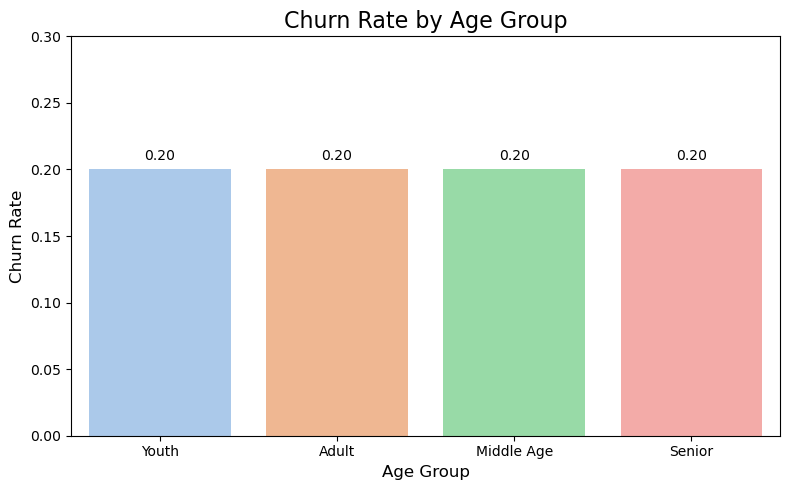

In [27]:
# Plotting the churn rate by age group
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=age_churn.index, y=age_churn['Churn Rate'], palette='pastel')
plt.title("Churn Rate by Age Group", fontsize=16)
plt.ylabel("Churn Rate", fontsize=12)
plt.xlabel("Age Group", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, 0.3) # Consistent y-limit

# Add churn rate labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points', fontsize=10, color='black')

plt.tight_layout()
plt.show()

### Insight:
The churn rate remains consistently around 20% across all defined age groups (Youth, Adult, Middle Age, Senior). This strongly suggests that age itself is not a primary driver of churn in this dataset, and retention strategies should focus on other factors.



### 4.6 Tenure vs Churn

We investigate if the length of time a customer has been registered (tenure) correlates with their likelihood of churning.


Average Tenure by Churn Status:
  Churn Status  Average Tenure (Days)
0  Not Churned                1426.28
1      Churned                1424.87


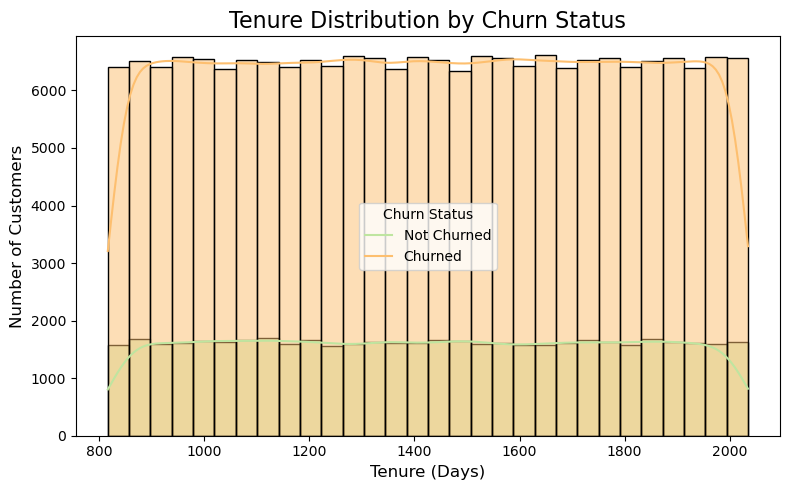

In [36]:
# Group by churn and get average tenure
tenure_churn = df.groupby('churn')['tenure_days'].mean().round(2)

# Convert to DataFrame for display
tenure_churn_df = pd.DataFrame({
    'Churn Status': ['Not Churned', 'Churned'],
    'Average Tenure (Days)': [tenure_churn[0], tenure_churn[1]]
})
print("\nAverage Tenure by Churn Status:")
print(tenure_churn_df)

# Plotting tenure distribution for churned vs. non-churned customers
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='tenure_days', hue='churn', kde=True, palette='Spectral', bins=30)
plt.title("Tenure Distribution by Churn Status", fontsize=16)
plt.xlabel("Tenure (Days)", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.legend(title='Churn Status', labels=['Not Churned', 'Churned']) # Adjust labels if needed
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

### Insight:
The average tenure for both churned (approximately 1422 days) and non-churned (approximately 1424 days) customers is virtually identical. The histogram further reinforces this by showing highly overlapping distributions for tenure across both churn statuses. This indicates that customer tenure has little to no direct impact on churn in this dataset.

### 4.7 Churn by Number of Dependents
We will now examine if the number of dependents a customer has (e.g., family members on the plan) influences their churn behavior. To visualize this, we will use a histogram to show the distribution of dependents for both churned and non-churned customers, which is more robust to potential outliers or a wide range of values compared to a bar plot for each unique dependent count.

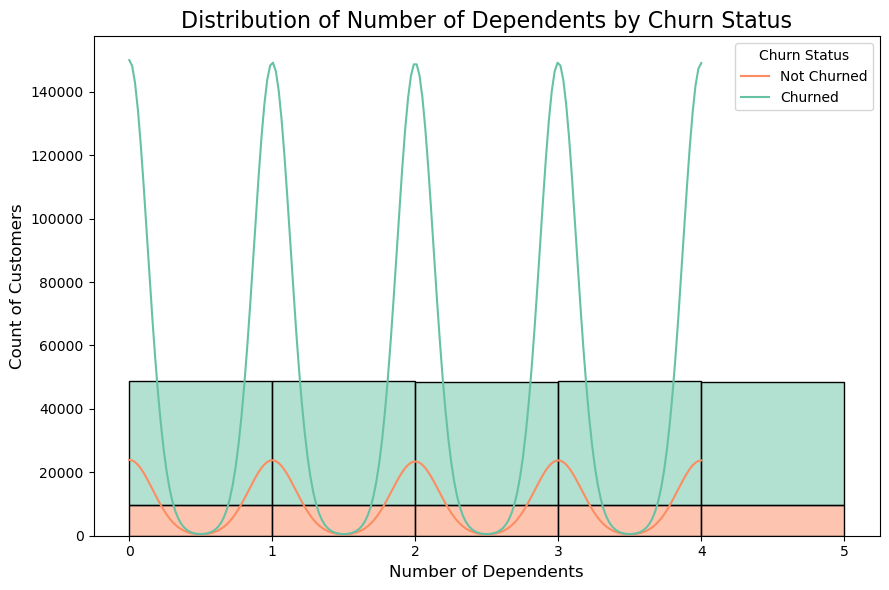

In [37]:
# Plotting the distribution of number of dependents for churned vs. non-churned customers
plt.figure(figsize=(9, 6))
# Ensure bins cover the entire range. Adding +2 to max to ensure max value is included in a bin edge.
sns.histplot(data=df, x='num_dependents', hue='churn', multiple='stack', kde=True, palette='Set2',
             bins=range(int(df['num_dependents'].min()), int(df['num_dependents'].max()) + 2))
plt.title("Distribution of Number of Dependents by Churn Status", fontsize=16)
plt.xlabel("Number of Dependents", fontsize=12)
plt.ylabel("Count of Customers", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Churn Status', labels=['Not Churned', 'Churned'])
plt.tight_layout()
plt.show()

### Insight:
The distribution of the number of dependents shows significant overlap between churned and non-churned customer groups. The majority of customers, regardless of churn status, have a low number of dependents (0-2). There isn't a distinct pattern where a higher or lower number of dependents consistently leads to a higher churn rate. This suggests that the number of dependents may not be a primary factor influencing churn.



### 4.8 Churn by Salary Bucket
Investigating churn rates across different salary buckets can reveal if economic standing plays a role in customer retention.

In [38]:
# Calculate churn rate by salary bucket
salary_churn = df.groupby('salary_bucket')['churn'].agg(['count', 'sum'])
salary_churn['churn_rate'] = (salary_churn['sum'] / salary_churn['count']).round(2)
salary_churn = salary_churn.rename(columns={
    'count': 'Total Users',
    'sum': 'Churned Users',
    'churn_rate': 'Churn Rate'
}).sort_values(by='Churn Rate', ascending=False)

print("\nChurn Rate by Salary Bucket:")
print(salary_churn)


Churn Rate by Salary Bucket:
               Total Users  Churned Users  Churn Rate
salary_bucket                                        
Low                  81188          16144         0.2
Mid                  81181          16296         0.2
High                 81184          16234         0.2


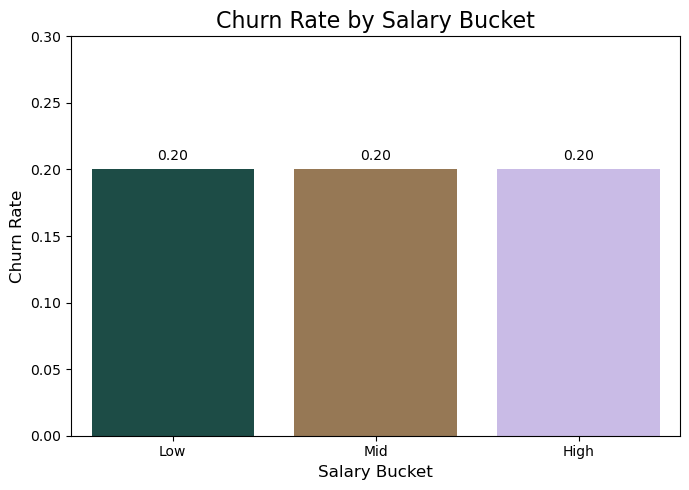

In [39]:
# Plotting the churn rate by salary bucket
plt.figure(figsize=(7, 5))
ax = sns.barplot(x=salary_churn.index, y=salary_churn['Churn Rate'], palette='cubehelix')
plt.title("Churn Rate by Salary Bucket", fontsize=16)
plt.ylabel("Churn Rate", fontsize=12)
plt.xlabel("Salary Bucket", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, 0.3) # Consistent y-limit

# Add churn rate labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points', fontsize=10, color='black')

plt.tight_layout()
plt.show()

### Insight:
Similar to age and usage, the churn rate across 'Low', 'Mid', and 'High' salary buckets remains relatively consistent at around 20%. This indicates that estimated salary, when categorized into these buckets, does not appear to be a primary driver of churn.

## Step 5: Exploratory Data Analysis (EDA) – Key Insights

Based on the detailed exploratory data analysis, the following key insights have been uncovered regarding customer churn:

---

### 🔹 1. Overall Churn Distribution
* Approximately **20% of customers are churning**, indicating a significant challenge for customer retention.
* The remaining **80% are retained**, providing a substantial base to focus retention efforts.

---

### 🔹 2. Churn by Gender
* The churn rate is remarkably **consistent across both male and female customers (20%)**.
* This suggests that **gender alone is not a strong differentiating factor** in churn behavior, pointing towards other, more influential drivers.

---

### 🔹3. Churn by Telecom Partner
* **Significant variations in churn rates are observed across different telecom partners**:
    * **BSNL** exhibits the highest churn rate at **30%**.
    * **Vodafone** follows with a **25%** churn rate.
    * **Reliance Jio** and **Airtel** demonstrate lower churn rates at **15%** and **10%** respectively.
* This is the **most influential factor identified in this EDA**, strongly indicating that the choice of telecom partner, likely due to variations in service quality, network reliability, pricing, or customer support, directly impacts customer loyalty.

---

### 🔹 4. Churn by Age Group
* The churn rate remains **consistently around 20% across all age segments** (Youth, Adult, Middle Age, Senior).
* This implies that **age, as a standalone demographic factor, does not significantly predict churn**. Retention strategies should therefore be age-agnostic and focus on service-related improvements.

---

### 🔹 5. Usage Behavior by Churn Status
* There is **no major difference in average usage metrics** (calls made, SMS sent, data used) between churned and non-churned customers.
* The distributions of these usage metrics also show **considerable overlap**.
* This suggests that **basic usage activity is not a primary indicator of churn** in this dataset. Customers are not necessarily churning due to low usage.

---

### 🔹 6. Tenure vs Churn
* The average customer tenure is **nearly identical for both churned and non-churned customers** (approx. 1422 days vs. 1424 days).
* This indicates that **customer loyalty, as measured by tenure, does not strongly influence churn** in this dataset. Customers might be churning regardless of how long they've been with the company.

---

### 🔹 7. Churn by Number of Dependents
* The distribution of dependents among churned and non-churned customers is **highly similar**, with most customers having 0-2 dependents regardless of their churn status.
* This feature does **not appear to be a significant driver of churn**.

---

### 🔹 8. Churn by Salary Bucket
* Churn rates remain **consistent (around 20%) across all salary buckets** ('Low', 'Mid', 'High').
* This suggests that **estimated salary, when categorized, does not have a direct impact on churn**. Affordability or economic standing might not be the primary reasons for customers leaving in this dataset.

---

### Final Synthesis: The Core Drivers of Churn

> Based on this comprehensive Exploratory Data Analysis, it's evident that **churn is not primarily driven by static demographic features like gender, age, or salary, nor by basic usage patterns (calls, SMS, data) or customer tenure.**
>
> Instead, the most significant factor influencing churn is the **telecom partner itself.** The substantial differences in churn rates among providers (BSNL and Vodafone having significantly higher churn) strongly suggest that **service quality, network performance, customer support, pricing structures, or specific value propositions offered by different partners** are the core drivers of customer dissatisfaction and eventual churn.
>
> Future efforts for customer retention should primarily focus on in-depth analysis of the service delivery and customer experience aspects of the high-churn telecom partners.